In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

In [2]:
def regula_falsi(f, a, b, tolerancia=1e-6, max_iter=100):
    """
    Método de Regula Falsi para encontrar una raíz de la función f en el intervalo [a, b].

    Parámetros:
    - f: función para la cual se desea encontrar la raíz.
    - a: extremo izquierdo del intervalo.
    - b: extremo derecho del intervalo.
    - tolerancia: valor mínimo aceptable de |f(c)| para considerar que se ha encontrado la raíz.
    - max_iter: número máximo de iteraciones permitidas.

    Retorna:
    - c: aproximación a la raíz de la función f dentro del intervalo [a, b].
    """

    # Verificamos que f(a) y f(b) tengan signos opuestos
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos para aplicar Regula Falsi.")

    for i in range(max_iter):
        # Calculamos el punto de intersección c usando la fórmula de Regula Falsi
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        fc = f(c)

        # Imprimimos información de la iteración actual
        print(f"Iteración {i + 1}: a = {a:.6f}, b = {b:.6f}, c = {c:.6f}, f(c) = {fc:.6f}")

        # Verificamos si f(c) es suficientemente cercano a cero
        if abs(fc) < tolerancia:
            return c  # Se encontró la raíz

        # Actualizamos el intervalo según el signo de f(c)
        if f(a) * fc < 0:
            b = c  # La raíz está entre a y c
        else:
            a = c  # La raíz está entre c y b

    # Si se llega aquí, no se encontró la raíz dentro del número de iteraciones
    print("No se encontró la raíz con la tolerancia y el número máximo de iteraciones dados.")
    return c


In [3]:
def f(x):
    """Función ejemplo: f(x) = x^2 - 4"""
    return x**2 - 4

# Intervalo inicial [0, 5], donde f(0) < 0 y f(5) > 0
raiz = regula_falsi(f, a=0, b=5, tolerancia=1e-6, max_iter=100)

if raiz is not None:
    print(f"\nRaíz encontrada: x = {raiz:.6f}")


Iteración 1: a = 0.000000, b = 5.000000, c = 0.800000, f(c) = -3.360000
Iteración 2: a = 0.800000, b = 5.000000, c = 1.379310, f(c) = -2.097503
Iteración 3: a = 1.379310, b = 5.000000, c = 1.708108, f(c) = -1.082367
Iteración 4: a = 1.708108, b = 5.000000, c = 1.869460, f(c) = -0.505119
Iteración 5: a = 1.869460, b = 5.000000, c = 1.942991, f(c) = -0.224785
Iteración 6: a = 1.942991, b = 5.000000, c = 1.975367, f(c) = -0.097925
Iteración 7: a = 1.975367, b = 5.000000, c = 1.989406, f(c) = -0.042265
Iteración 8: a = 1.989406, b = 5.000000, c = 1.995453, f(c) = -0.018168
Iteración 9: a = 1.995453, b = 5.000000, c = 1.998050, f(c) = -0.007797
Iteración 10: a = 1.998050, b = 5.000000, c = 1.999164, f(c) = -0.003343
Iteración 11: a = 1.999164, b = 5.000000, c = 1.999642, f(c) = -0.001433
Iteración 12: a = 1.999642, b = 5.000000, c = 1.999846, f(c) = -0.000614
Iteración 13: a = 1.999846, b = 5.000000, c = 1.999934, f(c) = -0.000263
Iteración 14: a = 1.999934, b = 5.000000, c = 1.999972, f(c)

# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

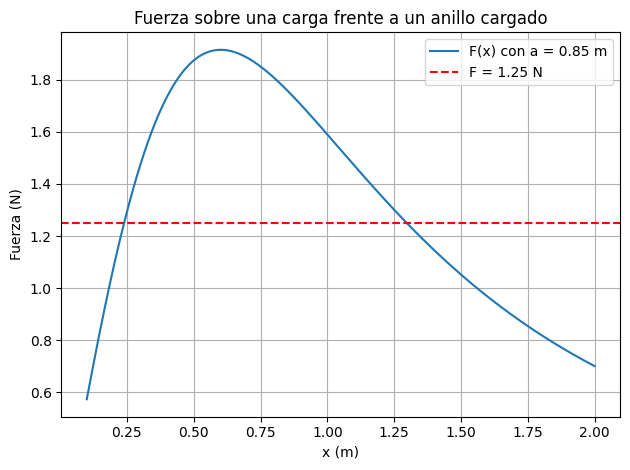

Newton-Raphson: x = 1.297374 m
Secante:         x = 1.297374 m


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
q = Q = 2e-5  # Cargas (Coulombs)
epsilon_0 = 8.854187817e-12  # Permitividad del vacío (C^2/N·m^2)
a = 0.85  # Radio del anillo (m)
objetivo = 1.25  # Fuerza objetivo (N)

# Función de fuerza
def fuerza(x, a):
    num = q * Q * x
    den = (x**2 + a**2)**(3/2)
    return (1 / (4 * np.pi * epsilon_0)) * num / den

# Derivada de la fuerza para Newton-Raphson
def derivada_fuerza(x, a):
    num = q * Q * (a**2 - 2 * x**2)
    den = (x**2 + a**2)**(5/2)
    return (1 / (4 * np.pi * epsilon_0)) * num / den

# Función auxiliar F(x) - objetivo
def funcion_diferencia(x, a, objetivo):
    return fuerza(x, a) - objetivo

# Método de Newton-Raphson
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        fx = f(x0)
        dfx = df(x0)
        if dfx == 0:
            raise ValueError("Derivada cero: no se puede continuar.")
        x1 = x0 - fx / dfx
        if abs(x1 - x0) < tol:
            return x1
        x0 = x1
    raise ValueError("Newton-Raphson no converge.")

# Método de la Secante
def metodo_secante(f, x0, x1, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        if fx1 - fx0 == 0:
            raise ValueError("División por cero en el método de la secante.")
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if abs(x2 - x1) < tol:
            return x2
        x0, x1 = x1, x2
    raise ValueError("Secante no converge.")

# ----------------- EJECUCIÓN -----------------

# 1. Gráfica de F(x)
x_vals = np.linspace(0.1, 2.0, 400)
f_vals = fuerza(x_vals, a)

plt.plot(x_vals, f_vals, label=f"F(x) con a = {a} m")
plt.axhline(objetivo, color='red', linestyle='--', label=f"F = {objetivo} N")
plt.xlabel("x (m)")
plt.ylabel("Fuerza (N)")
plt.title("Fuerza sobre una carga frente a un anillo cargado")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 2. Resolver F(x) = objetivo

# Función y derivada para Newton
f_obj = lambda x: funcion_diferencia(x, a, objetivo)
df_obj = lambda x: derivada_fuerza(x, a)

# Newton-Raphson
try:
    x_newton = newton_raphson(f_obj, df_obj, x0=1.0)
    print(f"Newton-Raphson: x = {x_newton:.6f} m")
except ValueError as e:
    print(f"Newton-Raphson: {e}")

# Secante
try:
    x_secante = metodo_secante(f_obj, x0=0.5, x1=1.5)
    print(f"Secante:         x = {x_secante:.6f} m")
except ValueError as e:
    print(f"Secante: {e}")


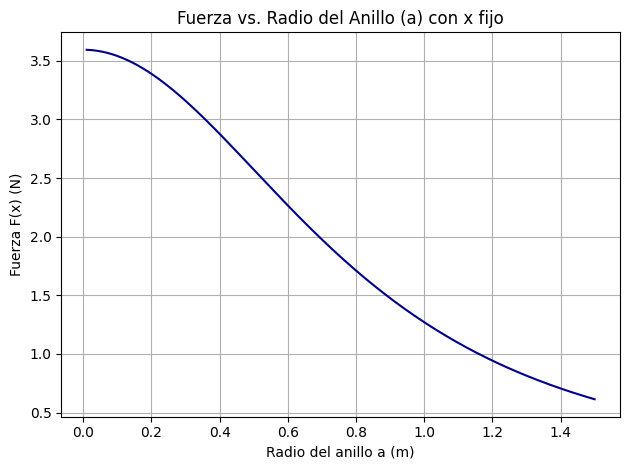

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
q = Q = 2e-5
epsilon_0 = 8.854187817e-12
x = 1.0  # Fijamos x para comparar

# Rangos de radio a
a_vals = np.linspace(0.01, 1.5, 300)
fuerzas = (1 / (4 * np.pi * epsilon_0)) * (q * Q * x) / ((x**2 + a_vals**2)**(3/2))

plt.plot(a_vals, fuerzas, color='darkblue')
plt.xlabel("Radio del anillo a (m)")
plt.ylabel("Fuerza F(x) (N)")
plt.title("Fuerza vs. Radio del Anillo (a) con x fijo")
plt.grid(True)
plt.tight_layout()
plt.show()


A menores radios a, mayor es la fuerza que experimenta la carga para un x constante.

# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



C:\Users\migue\AppData\Local\Temp\ipykernel_908\1991468391.py:13: RuntimeWarning: invalid value encountered in log
  return u * np.log(m0 / (m0 - q * t)) - g * t


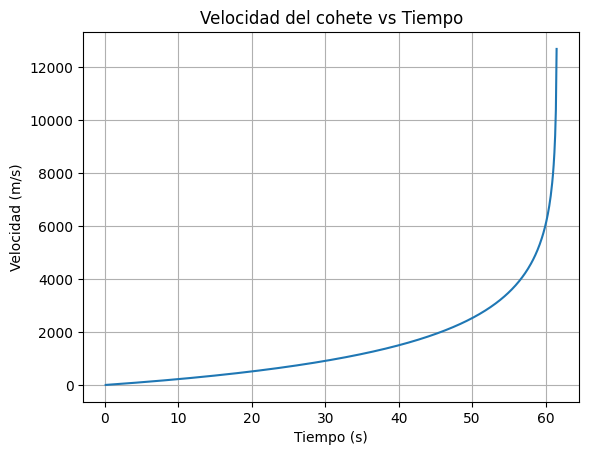

Newton-Raphson: t = 26.4078 s
Bisección: t = 26.4078 s
Regula-Falsi: t = 26.4078 s

Variación de u:
u = 1000 m/s => t = 42.3524 s
u = 1105 m/s => t = 39.5626 s
u = 1211 m/s => t = 36.9997 s
u = 1316 m/s => t = 34.6625 s
u = 1421 m/s => t = 32.5397 s
u = 1526 m/s => t = 30.6151 s
u = 1632 m/s => t = 28.8703 s
u = 1737 m/s => t = 27.2873 s
u = 1842 m/s => t = 25.8487 s
u = 1947 m/s => t = 24.5387 s
u = 2053 m/s => t = 23.3430 s
u = 2158 m/s => t = 22.2491 s
u = 2263 m/s => t = 21.2456 s
u = 2368 m/s => t = 20.3228 s
u = 2474 m/s => t = 19.4720 s
u = 2579 m/s => t = 18.6858 s
u = 2684 m/s => t = 17.9575 s
u = 2789 m/s => t = 17.2812 s
u = 2895 m/s => t = 16.6518 s
u = 3000 m/s => t = 16.0650 s


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, bisect, brentq

# Parámetros dados
m0 = 1.6e5  # kg
u = 1800    # m/s
q = 2600    # kg/s
g = 9.81    # m/s^2

# Función de velocidad
def v(t, u=u):
    return u * np.log(m0 / (m0 - q * t)) - g * t

# Parte 1: Gráfica de v(t)
t_vals = np.linspace(0.1, 100, 1000)
v_vals = v(t_vals)

plt.plot(t_vals, v_vals)
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.title("Velocidad del cohete vs Tiempo")
plt.grid(True)
plt.show()

# Parte 2: Resolver v(t) = 750 usando diferentes métodos

# Definir la función f(t) = v(t) - 750
def f(t):
    return v(t) - 750

# Newton-Raphson
df = lambda t: u * q / (m0 - q * t) - g
t_newton = newton(f, x0=20, fprime=df)

# Bisección
t_bisection = bisect(f, 1, 60)

# Regula-Falsi (usa brentq como alternativa estable)
t_regulafalsi = brentq(f, 1, 60)

print(f"Newton-Raphson: t = {t_newton:.4f} s")
print(f"Bisección: t = {t_bisection:.4f} s")
print(f"Regula-Falsi: t = {t_regulafalsi:.4f} s")

# Parte 3: Variar u y encontrar los tiempos correspondientes
u_vals = np.linspace(1000, 3000, 20)
t_results = []

for ui in u_vals:
    def f_ui(t): return ui * np.log(m0 / (m0 - q * t)) - g * t - 750
    try:
        t_sol = brentq(f_ui, 1, 60)
        t_results.append((ui, t_sol))
    except ValueError:
        t_results.append((ui, None))  # No solución en ese rango

print("\nVariación de u:")
for ui, ti in t_results:
    if ti is not None:
        print(f"u = {ui:.0f} m/s => t = {ti:.4f} s")
    else:
        print(f"u = {ui:.0f} m/s => No se encontró solución")



Si el combustible se expulsa a mayor velocidad, el cohete alcanza los 750 m/s más rápidamente. 